In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import matplotlib.pyplot as plt
import seaborn as sns

from game import *
from utils import *
from plots import *
from agents import *
from T4T import *

palette = sns.color_palette("colorblind")
sns.set_palette(palette)
sns.set(context='paper', style='white', font='CMU Serif', rc={'font.size':12, 'mathtext.fontset': 'cm'})

DQN0
DQN1
DQN2
DQN3
DQN4
DQN5
DQN6
DQN7
DQN8
DQN9
DQN0
DQN1
DQN2
DQN3
DQN4
DQN5
DQN6
DQN7
DQN8
DQN9
final strategy: G=0.008, S=9.9


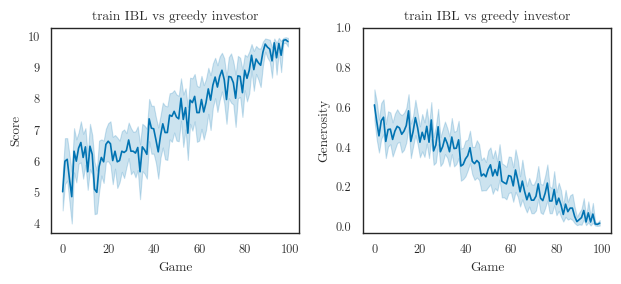

In [6]:
nAgents = 10
nGames_train = 100
nGames_test = 10
t4ts_train = make_greedy_trustees(nGames_train, seed=0)
t4ts_test = make_greedy_trustees(nGames_test, seed=1)

agents = []
for n in range(nAgents):
    agents.append(
        DQN(
            'investor',
            ID=f"DQN{n}",
            seed=n,
            nNeurons=30,
            alpha=0.01,
            gamma=0.3,
            explore='linear',
            update='SARSA',
            tau=5,
            w_s=1.0,
            w_o=0.0,
            w_i=0.0,
            nGames=nGames_train)
    )

agentIDs = [agent.ID for agent in agents]
data_train = run(agents, t4ts_train, 'investor', nGames=nGames_train, train=True)
data_test = run(agents, t4ts_test, 'investor', nGames=nGames_test, train=False)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=((6.38, 3)))
sns.lineplot(data=data_train.query("ID in @agentIDs"), x='game', y='coins', ax=axes[0], color=palette[0])
sns.lineplot(data=data_train.query("ID in @agentIDs"), x='game', y='generosity', ax=axes[1], color=palette[0])
axes[0].set(title='train DQN vs greedy investor', xlabel='Game', ylabel='Score')
axes[1].set(title='train DQN vs greedy investor', xlabel='Game', ylabel='Generosity', yticks=((0.0, 0.2, 0.4, 0.6, 0.8, 1.0)))
plt.tight_layout()

meanG = data_test.query("ID in @agentIDs")['generosity'].mean()
meanS = data_test.query("ID in @agentIDs")['coins'].mean()

print(f"final strategy: G={meanG:.2}, S={meanS:.2}")

IBL0
IBL1
IBL2
IBL3
IBL4
IBL5
IBL6
IBL7
IBL8
IBL9
IBL0
IBL1
IBL2
IBL3
IBL4
IBL5
IBL6
IBL7
IBL8
IBL9
final strategy: G=0.0029, S=1e+01


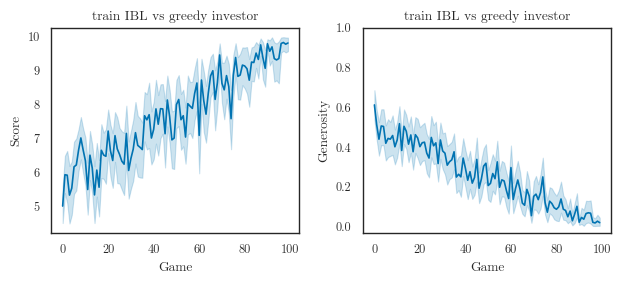

In [7]:
nAgents = 10
nGames_train = 100
nGames_test = 10
t4ts_train = make_greedy_trustees(nGames_train, seed=0)
t4ts_test = make_greedy_trustees(nGames_test, seed=1)

agents = []
for n in range(nAgents):
    agents.append(
        IBL(
            'investor',
            ID=f"IBL{n}",
            seed=n,
            gamma=0.3,
            explore='linear',
            update='SARSA',
            tau=5,
            w_s=1.0,
            w_o=0.0,
            w_i=0.0,
            nGames=nGames_train)
    )

agentIDs = [agent.ID for agent in agents]
data_train = run(agents, t4ts_train, 'investor', nGames=nGames_train, train=True)
data_test = run(agents, t4ts_test, 'investor', nGames=nGames_test, train=False)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=((6.38, 3)))
sns.lineplot(data=data_train.query("ID in @agentIDs"), x='game', y='coins', ax=axes[0], color=palette[0])
sns.lineplot(data=data_train.query("ID in @agentIDs"), x='game', y='generosity', ax=axes[1], color=palette[0])
axes[0].set(title='train IBL vs greedy investor', xlabel='Game', ylabel='Score')
axes[1].set(title='train IBL vs greedy investor', xlabel='Game', ylabel='Generosity', yticks=((0.0, 0.2, 0.4, 0.6, 0.8, 1.0)))
plt.tight_layout()

meanG = data_test.query("ID in @agentIDs")['generosity'].mean()
meanS = data_test.query("ID in @agentIDs")['coins'].mean()

print(f"final strategy: G={meanG:.2}, S={meanS:.2}")

# empirical

In [ ]:
emp = pd.read_pickle("human_data.pkl")
data = emp.query("orientation=='proself' & opponent=='greedy' & player=='investor'")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=((6.38, 3)))
sns.lineplot(data=data, x='game', y='coins', ax=axes[0], color=palette[7])
sns.lineplot(data=data, x='game', y='generosity', ax=axes[1], color=palette[7])
axes[0].set(xlabel='Game', ylabel='Score', yticks=((5,6,7,8,9,10)))
axes[1].set(xlabel='Game', ylabel='Generosity', yticks=((0.0, 0.2, 0.4, 0.6, 0.8, 1.0)))
plt.tight_layout()

xs = np.arange(0, 15, 1)
yN = 11
yN2 = 6
ys = np.linspace(0, 1, yN2)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=((6.38, 2)))
sns.histplot(data=data, x='game', y='generosity', bins=(15, yN), binrange=((0, 15),(0, 1)), ax=axes, color=palette[0])
axes2 = axes.twinx()
sns.lineplot(data=data, x='game', y='coins', ax=axes2, color=palette[1])
axes.set(ylabel="Generosity", title=f'proself humans vs. greedy trustee', xticks=xs, xlim=((0, 14)), yticks=ys, ylim=((min(ys), max(ys))))
axes2.set(ylabel='Score')
plt.tight_layout()